In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
  dataset_path = '/content/drive/MyDrive/Machine Learning/potential-talents - Aspiring human resources - seeking human resources.csv'

In [ ]:
#Importing necessary Libraries for pandas and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#loading the dataset
## for this instance, we specified dataset_path variable assigned with our dataset
df = pd.read_csv(dataset_path)

# Exploratory Data Analysis (EDA)

## Univariate Analysis

In [ ]:
#print first 5 rows of the dataset
df.head(15)

,id,job_title,location,connection,fit
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN
5,6,Aspiring Human Resources Specialist,Greater New York City Area,1,NaN
6,7,Student at Humber College and Aspiring Human R...,Kanada,61,NaN
7,8,HR Senior Specialist,San Francisco Bay Area,500+,NaN
8,9,Student at Humber College and Aspiring Human R...,Kanada,61,NaN
9,10,Seeking Human Resources HRIS and Generalist Po...,Greater Philadelphia Area,500+,NaN


In [ ]:
df.describe()

,id,fit
count,104.000000,0.0
mean,52.500000,NaN
std,30.166206,NaN
min,1.000000,NaN
25%,26.750000,NaN
50%,52.500000,NaN
75%,78.250000,NaN
max,104.000000,NaN


The output only shows id and fit column as df.describe only includes columns with numerical values. Other columns have data type of "object"


For this dataset, df.describe() would be not useful as id columns only shows user numbering and not the value that gives importance for that data.

In [ ]:
#print the dataframe's shae in rows x column
df.shape

(104, 5)

In [ ]:
#printing dataframe's data types
df.dtypes

,0
id,int64
job_title,object
location,object
connection,object
fit,float64


From the output of dtypes, fit is showing float64 even if it has empty values.

In Pandas, empty (or missing) values are represented as NaN (Not a Number). The NaN value is a special floating-point value.

In [ ]:
#printing the sum of the columns with no data.
#isnull() is the same with isna()
df.isnull().sum()

,0
id,0
job_title,0
location,0
connection,0
fit,104


From the output above, fit is showing total of 104 with empty columns. This is expected as what we're trying to achieve for this project is to predict the fit column of either 0 or 1.

In [ ]:
#removing fit column from the dataset as it is the target variable
#this will help in ensuring that from analysis and ML model to be applied at a later stage, this variable will
#not affect the model's performance.
df.drop(columns=['fit'], inplace=True)

In [ ]:
#revalidating if fit column has been removed
df.head()

,id,job_title,location,connection
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+


In [ ]:
#print unique valies from the "connection" column
df['connection'].unique()

array(['85', '500+ ', '44', '1', '61', '2', '390', '57', '82', '5', '7',
       '16', '212', '409', '52', '455', '174', '268', '50', '4', '40',
       '18', '349', '155', '39', '64', '9', '415', '19', '71', '48',
       '103', '49'], dtype=object)

In [ ]:
#print the overall count of unique values found in "connection" column
df['connection'].nunique()

33

In [ ]:
#print the count of how many times the unique values appeared in a column
df['connection'].value_counts()

,count
connection,
500+,44
85,7
61,7
44,6
1,5
2,4
390,2
57,2
7,2


In [ ]:
df['job_title'].nunique()

52

In [ ]:
df['location'].nunique()

41

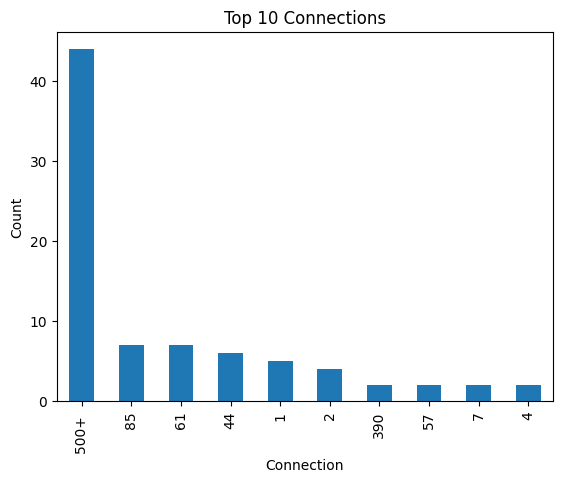

In [ ]:
# Bar plot for connections
df['connection'].value_counts().head(10).plot(kind='bar', title='Top 10 Connections')
plt.xlabel('Connection')
plt.ylabel('Count')
plt.show()

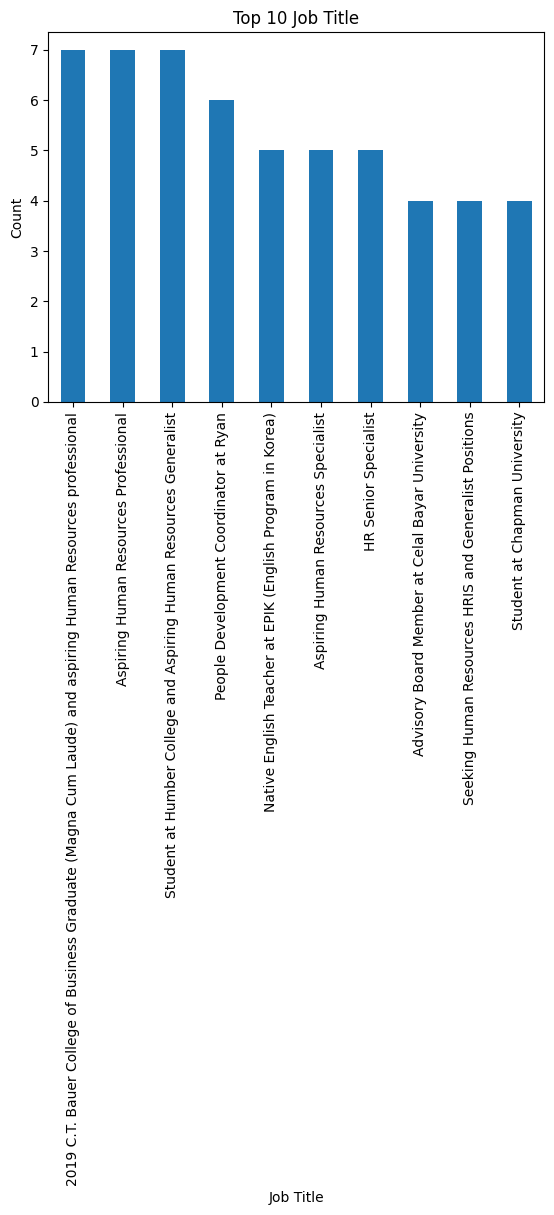

In [ ]:
# Bar plot for Job Title
df['job_title'].value_counts().head(10).plot(kind='bar', title='Top 10 Job Title')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.show()

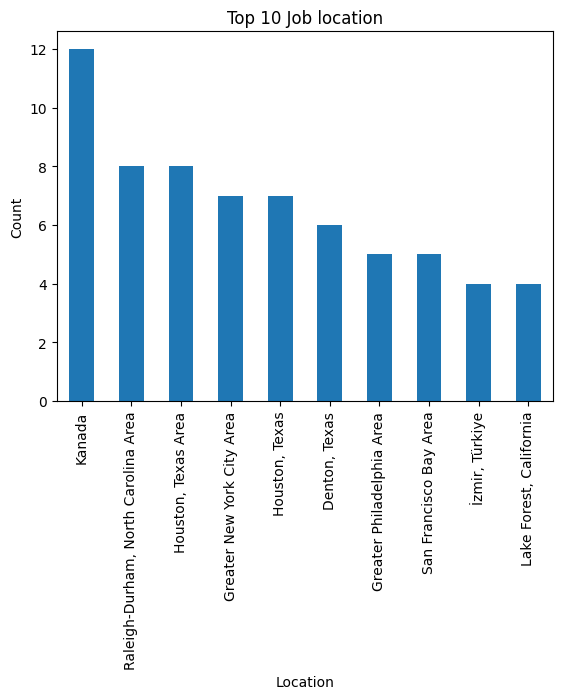

In [ ]:
# Bar plot for locaiton
df['location'].value_counts().head(10).plot(kind='bar', title='Top 10 Job location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

At a glance, we notice the following from the dataset.

From the dataset:
- it has a total of 104 data (as seen in the row count)
- we have 5 columns namely : ID, job_title, location, connection, fit
- fit column is empty or NaN as this is the target variable we are predicting.
- there are 33 out of 104 unique values from the connection column
- there are 52 out of 104 unique values from the job_title column
- there are 41 out of 104 unique values from the location column

From Visualization:
- Majority of the users has 500+ connections (40+)
- Majority of location is in Kanada with a total of 12 users
- Job Title shows multiple jobs with same count where majority is in 4-7 instances.

## Biviariate Analysis

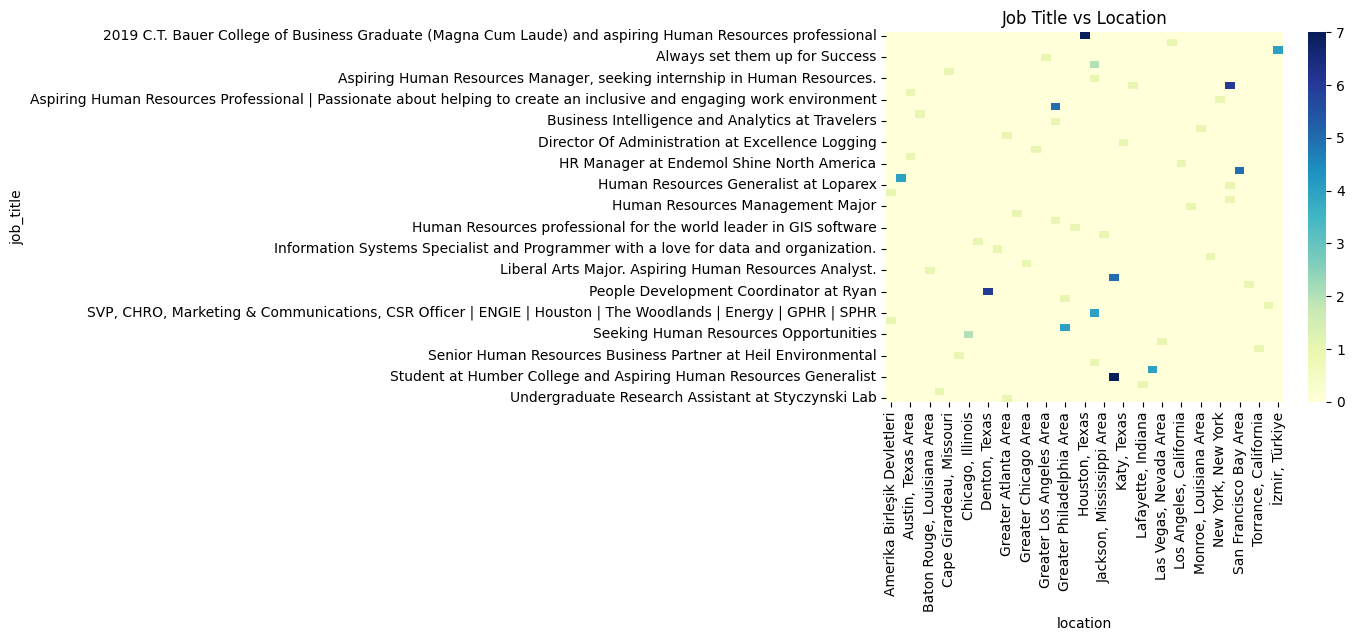

In [ ]:
crosstab = pd.crosstab(df['job_title'], df['location'])
sns.heatmap(crosstab, cmap="YlGnBu")
plt.title('Job Title vs Location')
plt.show()

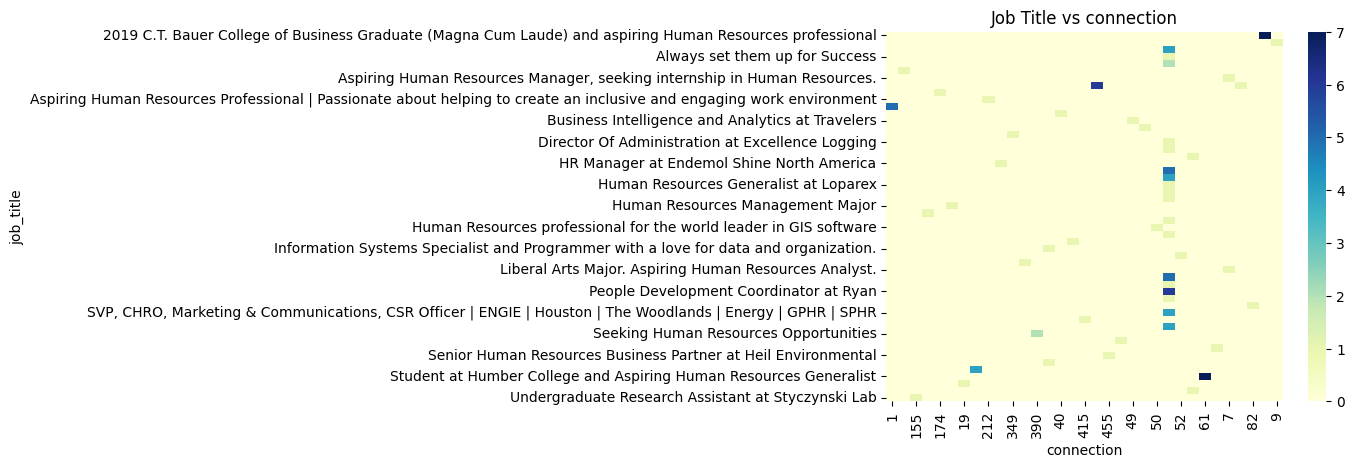

In [ ]:
crosstab = pd.crosstab(df['job_title'], df['connection'])
sns.heatmap(crosstab, cmap="YlGnBu")
plt.title('Job Title vs connection')
plt.show()

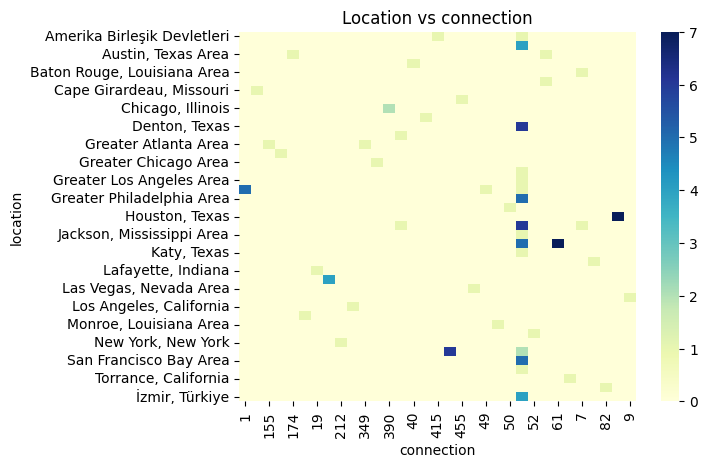

In [ ]:
crosstab = pd.crosstab(df['location'], df['connection'])
sns.heatmap(crosstab, cmap="YlGnBu")
plt.title('Location vs connection')
plt.show()

#Creating Word Cloud

In [ ]:
#installing wordcloud in jupyter notebook
!pip install wordcloud

In [ ]:
#loading wordcloud library to jupyter notebook
from wordcloud import WordCloud

In [ ]:
# Remove NaNs and convert to lowercase (optional)
job_titles_wc = df['job_title'].dropna().str.lower()

# Join all job titles into a single string
text = ' '.join(job_titles_wc)

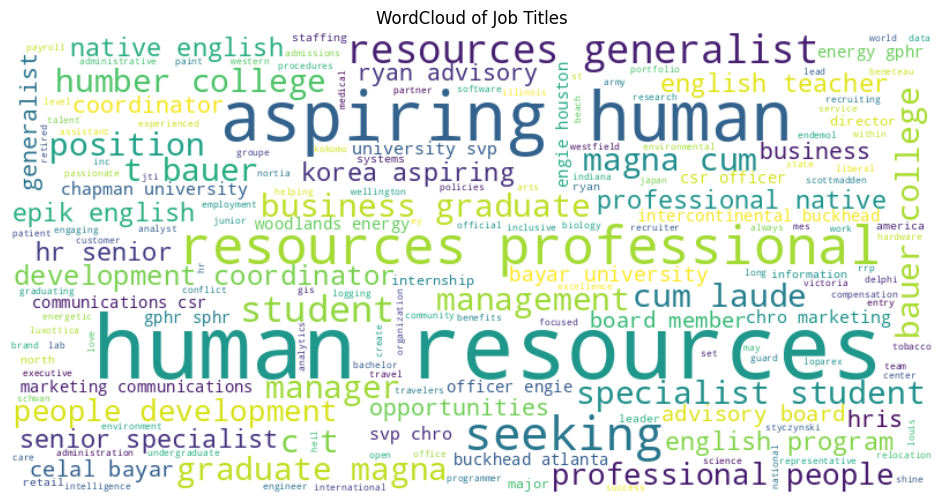

In [ ]:
# Generate and display a word cloud to visualize the most frequent job titles
wordcloud_wc = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_wc, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Job Titles')
plt.show()

In [ ]:
# Get frequencies dictionary
frequencies = wordcloud_wc.words_

# Printing top 10 ranked words
print("Top 10 words ranked from Word Cloud - Term Frequency")
top_10 = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)[:10]
for word, score in top_10:
  print(f"{word}: {score:.4f}")

Top 10 words ranked from Word Cloud - Term Frequency
human resources: 1.0000
aspiring human: 0.5556
resources professional: 0.3016
seeking: 0.2381
resources generalist: 0.1587
student: 0.1429
management: 0.1111
manager: 0.1111
position: 0.1111
c t: 0.1111


Computation observed from the output are the term frequency (TF) where it is computed based on how many times earch word appears in the text.

#Applying TF-IDF Vectorization for the Job_Title

In [ ]:
#importing required library for TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Drop NaNs and lowercase the text
job_titles_tfidf = df['job_title'].dropna().str.lower().tolist()

In [ ]:
#Creating TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(job_titles_tfidf)

In [ ]:
# Mean TF-IDF score for each word
mean_tfidf = np.asarray(X.mean(axis=0)).flatten()
words = vectorizer.get_feature_names_out()

# Create dictionary of words and their average TF-IDF scores
tfidf_dict = dict(zip(words, mean_tfidf))

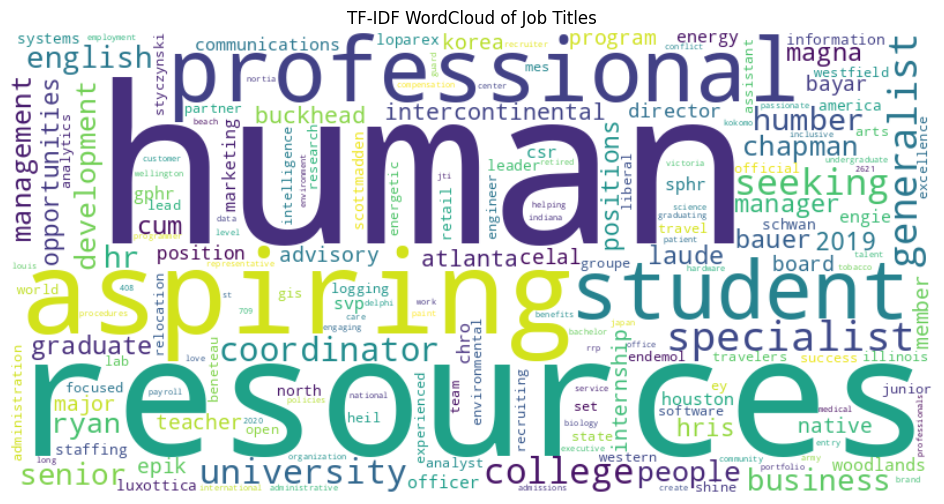

In [ ]:
wordcloud_tfidf = WordCloud(width=800, height=400, background_color='white')
wordcloud_tfidf.generate_from_frequencies(tfidf_dict)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_tfidf, interpolation='bilinear')
plt.axis('off')
plt.title('TF-IDF WordCloud of Job Titles')
plt.show()

In [ ]:
sorted_tfidf = sorted(tfidf_dict.items(), key=lambda item: item[1], reverse=True)

print("Top 10 words by average TF-IDF score:")
for word, score in sorted_tfidf[:10]:
    print(f"{word}: {score:.4f}")

Top 10 words by average TF-IDF score:
human: 0.1373
resources: 0.1373
aspiring: 0.1111
professional: 0.0812
student: 0.0684
specialist: 0.0661
generalist: 0.0581
seeking: 0.0519
college: 0.0477
university: 0.0440


#Vectorizing Search Term

In [ ]:
# Convert multiple search terms (like job titles or keywords) into vectors
# This allows us to compare the search terms to existing job titles numerically.
search_term = ["student"]
search_vector = vectorizer.transform(search_term)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Get similarity between search vector and all job titles
similarity_scores = cosine_similarity(search_vector, X)

for i, term in enumerate(search_term):
    print(f"\n🔍 Top matches for search term: '{term}'")
    scores = similarity_scores[i]
    top_indices = np.argsort(scores)[::-1]  # descending sort

    for rank, idx in enumerate(top_indices[:10], start=1):  # Top 10 results
        title = job_titles_tfidf[idx]
        similarity = scores[idx]
        print(f"{rank}. {title} - Similarity: {similarity:.4f}")


🔍 Top matches for search term: 'student'
1. student - Similarity: 1.0000
2. student at chapman university - Similarity: 0.4848
3. student at chapman university - Similarity: 0.4848
4. student at chapman university - Similarity: 0.4848
5. student at chapman university - Similarity: 0.4848
6. student at humber college and aspiring human resources generalist - Similarity: 0.4113
7. student at humber college and aspiring human resources generalist - Similarity: 0.4113
8. student at humber college and aspiring human resources generalist - Similarity: 0.4113
9. student at humber college and aspiring human resources generalist - Similarity: 0.4113
10. student at humber college and aspiring human resources generalist - Similarity: 0.4113


In [ ]:
job_titles_tfidf_df = df['job_title'].dropna().str.lower().reset_index()

In [ ]:
for i, term in enumerate(search_term):
    print(f"\n🔍 Top matches for search term: '{term}'")
    scores = similarity_scores[i]
    top_indices = np.argsort(scores)[::-1]

    #seen_titles = set()
    rank = 1

    for idx in top_indices:
        title = job_titles_tfidf_df.loc[idx, 'job_title']
        original_index = job_titles_tfidf_df.loc[idx, 'index']

        #if title not in seen_titles:
        print(f"{rank}. {title} (Index {original_index}) - Similarity: {scores[idx]:.4f}")
            #seen_titles.add(title)
        rank += 1

        if rank > 10:
            break


🔍 Top matches for search term: 'student'
1. student (Index 97) - Similarity: 1.0000
2. student at chapman university (Index 40) - Similarity: 0.4848
3. student at chapman university (Index 53) - Similarity: 0.4848
4. student at chapman university (Index 62) - Similarity: 0.4848
5. student at chapman university (Index 10) - Similarity: 0.4848
6. student at humber college and aspiring human resources generalist (Index 49) - Similarity: 0.4113
7. student at humber college and aspiring human resources generalist (Index 36) - Similarity: 0.4113
8. student at humber college and aspiring human resources generalist (Index 38) - Similarity: 0.4113
9. student at humber college and aspiring human resources generalist (Index 51) - Similarity: 0.4113
10. student at humber college and aspiring human resources generalist (Index 24) - Similarity: 0.4113


#Word2Vec Implementation

In [ ]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 43.2 MB/s eta 0:00:00


In [ ]:
import gensim
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt_tab')

# Lowercase, remove punctuation, tokenize
job_titles_w2v = df['job_title'].dropna().str.lower()
job_titles_w2v = job_titles_w2v.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
tokenized_titles = job_titles_w2v.apply(word_tokenize).tolist()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# Train Word2Vec on tokenized job titles
model = Word2Vec(sentences=tokenized_titles, vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
model.wv.most_similar("student")

[('teacher', 0.36274993419647217),
 ('hr', 0.3066377639770508),
 ('houston', 0.2629408538341522),
 ('recruiter', 0.25743889808654785),
 ('america', 0.23138275742530823),
 ('retired', 0.22536548972129822),
 ('management', 0.19022220373153687),
 ('office', 0.17560458183288574),
 ('english', 0.17549216747283936),
 ('hardware', 0.17414022982120514)]

In [ ]:
def get_phrase_vector(phrase, model):
    tokens = word_tokenize(phrase.lower())
    tokens = [t for t in tokens if t in model.wv]
    if not tokens:
        return np.zeros(model.wv.vector_size)
    return np.mean([model.wv[t] for t in tokens], axis=0)

# Vectorize all job titles
job_title_vectors = np.array([get_phrase_vector(title, model) for title in job_titles_w2v])
#job_title_vectors = np.vstack([get_phrase_vector(title, model) for title in job_titles_w2v])

In [ ]:
search_term = "student"
search_vector = get_phrase_vector(search_term, model).reshape(1, -1)

# Calculate cosine similarity
#similarities = cosine_similarity(search_vector, job_title_vectors).flatten()
similarities = cosine_similarity(search_vector, job_title_vectors).flatten()

# Sort and show top results
top_indices = np.argsort(similarities)[::-1]

print(f"\n🔍 Top matches for search term: '{search_term}'")
for rank, idx in enumerate(top_indices[:10], start=1):
    print(f"{rank}. {job_titles_w2v.iloc[idx]} - Similarity: {similarities[idx]:.4f}")


🔍 Top matches for search term: 'student'
1. student - Similarity: 1.0000
2. student at chapman university - Similarity: 0.4965
3. student at chapman university - Similarity: 0.4965
4. student at chapman university - Similarity: 0.4965
5. student at chapman university - Similarity: 0.4965
6. student at westfield state university - Similarity: 0.4683
7. aspiring human resources management student seeking an internship - Similarity: 0.4260
8. aspiring human resources management student seeking an internship - Similarity: 0.4260
9. student at humber college and aspiring human resources generalist - Similarity: 0.3863
10. student at humber college and aspiring human resources generalist - Similarity: 0.3863


In [ ]:
search_term = "student"
search_vector = get_phrase_vector(search_term, model).reshape(1, -1)

# Calculate cosine similarity
similarities = cosine_similarity(search_vector, job_title_vectors).flatten()

# Sort and show top results
top_indices = np.argsort(similarities)[::-1]

print(f"\n🔍 Top matches for search term: '{search_term}'")
for rank, idx in enumerate(top_indices[:10], start=1):
    applicant_id = df['id'].iloc[idx]
    job_title = job_titles_w2v.iloc[idx]
    similarity = similarities[idx]
    print(f"{rank}. ID: {applicant_id} - Job Title: {job_title} - Similarity: {similarity:.4f}")


🔍 Top matches for search term: 'student'
1. ID: 98 - Job Title: student - Similarity: 1.0000
2. ID: 41 - Job Title: student at chapman university - Similarity: 0.4965
3. ID: 54 - Job Title: student at chapman university - Similarity: 0.4965
4. ID: 63 - Job Title: student at chapman university - Similarity: 0.4965
5. ID: 11 - Job Title: student at chapman university - Similarity: 0.4965
6. ID: 95 - Job Title: student at westfield state university - Similarity: 0.4683
7. ID: 27 - Job Title: aspiring human resources management student seeking an internship - Similarity: 0.4260
8. ID: 29 - Job Title: aspiring human resources management student seeking an internship - Similarity: 0.4260
9. ID: 52 - Job Title: student at humber college and aspiring human resources generalist - Similarity: 0.3863
10. ID: 39 - Job Title: student at humber college and aspiring human resources generalist - Similarity: 0.3863


#GloVe (Global Venctors for Word Representation) Implementation

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
glove_words = df['job_title'].dropna().str.lower()

In [ ]:
# Create and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(glove_words)

print("Number of unique words in dictionary =", len(tokenizer.word_index))
print("Dictionary is =", tokenizer.word_index)

Number of unique words in dictionary = 203
Dictionary is = {'human': 1, 'resources': 2, 'at': 3, 'aspiring': 4, 'and': 5, 'professional': 6, 'student': 7, 'seeking': 8, 'college': 9, 'generalist': 10, 'university': 11, 'specialist': 12, 'of': 13, 'business': 14, 'english': 15, 'in': 16, 'coordinator': 17, '2019': 18, 'c': 19, 't': 20, 'bauer': 21, 'graduate': 22, 'magna': 23, 'cum': 24, 'laude': 25, 'humber': 26, 'management': 27, 'manager': 28, 'people': 29, 'development': 30, 'ryan': 31, 'hr': 32, 'senior': 33, 'native': 34, 'teacher': 35, 'epik': 36, 'program': 37, 'korea': 38, 'the': 39, 'an': 40, 'advisory': 41, 'board': 42, 'member': 43, 'celal': 44, 'bayar': 45, 'hris': 46, 'positions': 47, 'chapman': 48, 'svp': 49, 'chro': 50, 'marketing': 51, 'communications': 52, 'csr': 53, 'officer': 54, 'engie': 55, 'houston': 56, 'woodlands': 57, 'energy': 58, 'gphr': 59, 'sphr': 60, 'intercontinental': 61, 'buckhead': 62, 'atlanta': 63, 'opportunities': 64, 'internship': 65, 'director': 6

The dictionary output shows that after fitting the tokenizer, it gives each words index (1, 2, 3, and so on) where 1st index (in this case human) is the most frequent word from the dataset.

In a way, it is sorting the words based on the frequency it has been used from the dataset from the most frequent to least frequent based on index number

In [ ]:
def embedding_for_vocab(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # +1 for padding token (index 0)
    embedding_matrix_vocab = np.zeros((vocab_size, embedding_dim))

    with open(filepath, encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix_vocab[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix_vocab

In [ ]:
# Download the GloVe dataset
!wget https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip

#Unzip the file
!unzip -q glove.6B.zip

--2025-10-25 06:19:16--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.02MB/s    in 2m 39s  

2025-10-25 06:21:56 (5.16 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [ ]:
# Set embedding dimension (match this with glove file)
embedding_dim = 50

# Path to GloVe file
glove_path = './glove.6B.50d.txt'

# Generate embedding matrix
embedding_matrix_vocab = embedding_for_vocab(glove_path, tokenizer.word_index, embedding_dim)

In [ ]:
# Print the dense vector for the first word in the tokenizer index
first_word_index = 1  # Tokenizer indexes start from 1
print("Dense vector for word with index 1 =>", embedding_matrix_vocab[first_word_index])

Dense vector for word with index 1 => [ 0.61853999  0.11915    -0.46786001  0.31367999  1.03340006  0.95964003
  0.87803    -1.03460002  1.6322      0.29347     0.80844003 -0.058903
  0.021251    0.40985999  0.54443002 -0.33311     0.53711998 -0.35822999
  0.29374     0.090151   -0.92049003  0.69385999  0.39098001 -0.64392
  0.77831    -1.72150004 -0.48392999 -0.50326997 -0.22508     0.099192
  3.20950007 -0.31553999 -0.71754003 -1.67519999 -1.35370004  0.15195
  0.054557   -0.16329999 -0.027993    0.3917     -0.55006999 -0.079205
  0.63388997  0.51446003  0.70124     0.27638    -0.53444999  0.064808
 -0.21974    -0.52047998]


In [ ]:
from numpy.linalg import norm

def cosine_similarity_glove(vec1, vec2):
    if norm(vec1) == 0 or norm(vec2) == 0:
        return 0.0
    return np.dot(vec1, vec2) / (norm(vec1) * norm(vec2))

In [ ]:
def sentence_to_avg_vector(sentence, tokenizer, embedding_matrix, embedding_dim):
    tokens = tokenizer.texts_to_sequences([sentence.lower()])[0]
    valid_vectors = [embedding_matrix[i] for i in tokens if i > 0 and i < embedding_matrix.shape[0]]
    if not valid_vectors:
        return np.zeros(embedding_dim)
    return np.mean(valid_vectors, axis=0)

In [ ]:
search_term = "student"
embedding_dim = 50  # same as you used for GloVe
search_vector = sentence_to_avg_vector(search_term, tokenizer, embedding_matrix_vocab, embedding_dim)

# Store titles and similarity scores
similarities = []

for title in glove_words:
    title_vector = sentence_to_avg_vector(title, tokenizer, embedding_matrix_vocab, embedding_dim)
    similarity_score = cosine_similarity_glove(search_vector, title_vector)
    similarities.append((title, similarity_score))

# Sort results
similarities.sort(key=lambda x: x[1], reverse=True)

# Display top 10 matches
print(f"\n🔍 Top matches for search term: '{search_term}'")
for rank, (title, score) in enumerate(similarities[:10], 1):
    print(f"{rank}. {title} - Similarity: {score:.4f}")



🔍 Top matches for search term: 'student'
1. student - Similarity: 1.0000
2. student at chapman university - Similarity: 0.8583
3. student at chapman university - Similarity: 0.8583
4. student at chapman university - Similarity: 0.8583
5. student at chapman university - Similarity: 0.8583
6. student at westfield state university - Similarity: 0.8139
7. student at humber college and aspiring human resources generalist - Similarity: 0.8133
8. student at humber college and aspiring human resources generalist - Similarity: 0.8133
9. student at humber college and aspiring human resources generalist - Similarity: 0.8133
10. student at humber college and aspiring human resources generalist - Similarity: 0.8133


In [ ]:
search_term = "student"
embedding_dim = 50  # same as used for GloVe
search_vector = sentence_to_avg_vector(search_term, tokenizer, embedding_matrix_vocab, embedding_dim)

# Store (id, title, similarity) tuples
similarities = []

# Use df.dropna to avoid rows with missing job titles
for _, row in df.dropna(subset=['job_title']).iterrows():
    title = row['job_title'].lower()
    applicant_id = row['id']  # This is your unique applicant index

    title_vector = sentence_to_avg_vector(title, tokenizer, embedding_matrix_vocab, embedding_dim)
    similarity_score = cosine_similarity_glove(search_vector, title_vector)

    similarities.append((applicant_id, title, similarity_score))

# Sort results
similarities.sort(key=lambda x: x[2], reverse=True)

# Display top 10 matches
print(f"\n🔍 Top matches for search term: '{search_term}'")
for rank, (applicant_id, title, score) in enumerate(similarities[:10], 1):
    print(f"{rank}. {title} (Applicant ID: {applicant_id}) - Similarity: {score:.4f}")


🔍 Top matches for search term: 'student'
1. student (Applicant ID: 98) - Similarity: 1.0000
2. student at chapman university (Applicant ID: 11) - Similarity: 0.8583
3. student at chapman university (Applicant ID: 41) - Similarity: 0.8583
4. student at chapman university (Applicant ID: 54) - Similarity: 0.8583
5. student at chapman university (Applicant ID: 63) - Similarity: 0.8583
6. student at westfield state university (Applicant ID: 95) - Similarity: 0.8139
7. student at humber college and aspiring human resources generalist (Applicant ID: 7) - Similarity: 0.8133
8. student at humber college and aspiring human resources generalist (Applicant ID: 9) - Similarity: 0.8133
9. student at humber college and aspiring human resources generalist (Applicant ID: 25) - Similarity: 0.8133
10. student at humber college and aspiring human resources generalist (Applicant ID: 37) - Similarity: 0.8133


#fasttext by facebook Implementation

In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-3.0.1-py3-none-any.whl.metadata (10.0 kB)
Using cached pybind11-3.0.1-py3-none-any.whl (293 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp312-cp312-linux_x86_64.whl size=4498209 sha256=c5d184ee79aad714f878d3e0f8664af94cdd7d487fe3d519ade194df394dc330
  Stored in directory: /root/.cache/pip/wheels/20/27/95/a7baf1b435f1cbde017cabdf1e9688526d2b0e929255a359c6
Successfully built fasttext


In [ ]:
#from gensim.models import FastText
import nltk
from nltk.tokenize import word_tokenize
import string
import fasttext

In [ ]:
# Download NLTK tokenizer data
# nltk.download('punkt_tab')

In [ ]:
# Clean and lowercase job titles
job_titles_ft = df['job_title'].dropna().str.lower()

# Save each job title as one line in job_titles.txt
with open("job_titles.txt", "w", encoding="utf-8") as f:
    for title in job_titles_ft:
        f.write(title + "\n")

In [ ]:
model_ft = fasttext.train_unsupervised(
    'job_titles.txt',
    model='skipgram',   # or 'cbow'
    dim=100,            # vector size
    ws=5,               # context window
    minCount=1          # keep all words (like min_count in gensim)
)

In [ ]:
# Save
model_ft.save_model("job_titles_ft.bin")

# Load later
model_ft = fasttext.load_model("job_titles_ft.bin")

In [ ]:
vec_ft = model_ft.get_word_vector("student")

# Get vectors for a sentence (average of word vectors)
def get_phrase_vector_ft(phrase, model):
    words = phrase.lower().split()
    vectors = [model.get_word_vector(w) for w in words]
    return sum(vectors) / len(vectors) if vectors else np.zeros(model.get_dimension())

In [ ]:
# Load job titles from file
with open("job_titles.txt", "r", encoding="utf-8") as f:
    job_titles_ft = [line.strip() for line in f]

# Create embeddings for all job titles
job_title_vectors_ft = np.array([get_phrase_vector_ft(title, model_ft) for title in job_titles_ft])

In [ ]:
search_term = "student"
search_vector_ft = get_phrase_vector_ft(search_term, model_ft).reshape(1, -1)

# Compute cosine similarities
similarities = cosine_similarity(search_vector_ft, job_title_vectors_ft).flatten()

# Sort results
top_indices = np.argsort(similarities)[::-1]

print(f"\n🔍 Top matches for '{search_term}':")
for i in top_indices[:10]:
    print(f"{job_titles_ft[i]} - Similarity: {similarities[i]:.4f}")


🔍 Top matches for 'student':
student - Similarity: 1.0000
student at westfield state university - Similarity: 0.3180
student at chapman university - Similarity: 0.2697
student at chapman university - Similarity: 0.2697
student at chapman university - Similarity: 0.2697
student at chapman university - Similarity: 0.2697
aspiring human resources management student seeking an internship - Similarity: 0.2346
aspiring human resources management student seeking an internship - Similarity: 0.2346
conflict management| - Similarity: 0.2104
student at humber college and aspiring human resources generalist - Similarity: 0.1969


# FastText by gensim Implementation

In [ ]:
from gensim.models import FastText
import nltk
from nltk.tokenize import word_tokenize
import string

In [ ]:
# Download NLTK tokenizer data
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Lowercase, remove punctuation, tokenize
job_titles_FT = df['job_title'].dropna().str.lower()
job_titles_FT = job_titles_FT.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
tokenized_titles_FT = job_titles_FT.apply(word_tokenize).tolist()

In [ ]:
#Train FastText Model

model_FT = FastText(
    sentences=tokenized_titles_FT,
    vector_size=100,  # dimensionality of vectors
    window=5,         # context window size
    min_count=1,      # include words that appear at least once
    workers=4,        # number of threads
    sg=1              # skip-gram model; set to 0 for CBOW
)

In [ ]:
# Helper Function
def get_phrase_vector_FT(phrase, model):
    """Convert phrase to vector by averaging token vectors."""
    tokens = word_tokenize(phrase.lower())
    tokens = [t for t in tokens if t in model.wv]  # filter out OOV tokens
    if not tokens:
        return np.zeros(model.vector_size)
    return np.mean([model.wv[t] for t in tokens], axis=0)

In [ ]:
# Vectorize All Job Titles
job_title_vectors_FT = np.array([get_phrase_vector_FT(title, model_FT) for title in job_titles_FT])

In [ ]:
# Search & Display Results

search_term_FT = "student"
search_vector_FT = get_phrase_vector_FT(search_term_FT, model_FT).reshape(1, -1)

# Calculate cosine similarity
similarities = cosine_similarity(search_vector_FT, job_title_vectors_FT).flatten()

# Sort by highest similarity
top_indices = np.argsort(similarities)[::-1]

print(f"\n🔍 Top matches for search term: '{search_term_FT}'")
for rank, idx in enumerate(top_indices[:10], start=1):
    applicant_id = df['id'].iloc[idx]
    job_title_FT = job_titles_FT.iloc[idx]
    similarity = similarities[idx]
    print(f"{rank}. ID: {str(applicant_id)} - Job Title: {job_title_FT} - Similarity: {similarity:.4f}")


🔍 Top matches for search term: 'student'
1. ID: 98 - Job Title: student - Similarity: 1.0000
2. ID: 27 - Job Title: aspiring human resources management student seeking an internship - Similarity: 0.5741
3. ID: 29 - Job Title: aspiring human resources management student seeking an internship - Similarity: 0.5741
4. ID: 63 - Job Title: student at chapman university - Similarity: 0.5481
5. ID: 54 - Job Title: student at chapman university - Similarity: 0.5481
6. ID: 41 - Job Title: student at chapman university - Similarity: 0.5481
7. ID: 11 - Job Title: student at chapman university - Similarity: 0.5481
8. ID: 95 - Job Title: student at westfield state university - Similarity: 0.5440
9. ID: 52 - Job Title: student at humber college and aspiring human resources generalist - Similarity: 0.5349
10. ID: 39 - Job Title: student at humber college and aspiring human resources generalist - Similarity: 0.5349


#Contextualized Embedding

##Sentence-Transformers

In [ ]:
!pip install sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Load a pre-trained model (good trade-off: fast + accurate)
model_ctx = SentenceTransformer('all-MiniLM-L6-v2')

# Encode job titles
job_titles_ctx = df['job_title'].dropna().tolist()
job_title_vectors_ctx = model_ctx.encode(job_titles_ctx, convert_to_numpy=True)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Encode search term
search_term_ctx = "student"
search_vector_ctx = model_ctx.encode([search_term_ctx], convert_to_numpy=True)

# Calculate similarity
similarities = cosine_similarity(search_vector_ctx, job_title_vectors_ctx).flatten()

# Sort results
top_indices = np.argsort(similarities)[::-1]

print(f"\n🔍 Top contextual matches for search term: '{search_term_ctx}'")
for rank, idx in enumerate(top_indices[:10], start=1):
    applicant_id = df['id'].iloc[idx]
    job_title = job_titles_ctx[idx]
    similarity = similarities[idx]
    print(f"{rank}. ID: {applicant_id} - Job Title: {job_title} - Similarity: {similarity:.4f}")


🔍 Top contextual matches for search term: 'student'
1. ID: 98 - Job Title: Student - Similarity: 1.0000
2. ID: 95 - Job Title: Student at Westfield State University - Similarity: 0.6164
3. ID: 63 - Job Title: Student at Chapman University - Similarity: 0.6016
4. ID: 54 - Job Title: Student at Chapman University - Similarity: 0.6016
5. ID: 11 - Job Title: Student at Chapman University - Similarity: 0.6016
6. ID: 41 - Job Title: Student at Chapman University - Similarity: 0.6016
7. ID: 96 - Job Title: Student at Indiana University Kokomo - Business Management - 
Retail Manager at Delphi Hardware and Paint - Similarity: 0.4086
8. ID: 35 - Job Title: Advisory Board Member at Celal Bayar University - Similarity: 0.3980
9. ID: 48 - Job Title: Advisory Board Member at Celal Bayar University - Similarity: 0.3980
10. ID: 23 - Job Title: Advisory Board Member at Celal Bayar University - Similarity: 0.3980


## HuggingFace Transformers

In [ ]:
!pip install transformers torch

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

In [ ]:
# Load BERT model + tokenizer
tokenizer_HF = AutoTokenizer.from_pretrained("bert-base-uncased")
model_HF = AutoModel.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
def get_embedding_HF(text):
    inputs = tokenizer_HF(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model_HF(**inputs)
    # CLS token embedding (alternative: mean pooling across tokens)
    return outputs.last_hidden_state[:, 0, :].numpy()

In [ ]:
# ----- Encode your dataframe job titles -----
job_titles_HF = df['job_title'].dropna().tolist()
job_title_vectors_HF = np.vstack([get_embedding_HF(title) for title in job_titles_HF])

In [ ]:
# ----- Encode search term -----
search_term_HF = "student"
search_vector_HF = get_embedding_HF(search_term_HF)

# ----- Compute similarity -----
similarities = cosine_similarity(search_vector_HF, job_title_vectors_HF).flatten()

# ----- Sort results -----
top_indices = np.argsort(similarities)[::-1]

print(f"\n🔍 Top contextual matches for search term: '{search_term_ctx}'")
for rank, idx in enumerate(top_indices[:10], start=1):
    applicant_id = df['id'].iloc[idx]
    job_title = job_titles_ctx[idx]
    similarity = similarities[idx]
    print(f"{rank}. ID: {applicant_id} - Job Title: {job_title} - Similarity: {similarity:.4f}")


🔍 Top contextual matches for search term: 'student'
1. ID: 98 - Job Title: Student - Similarity: 1.0000
2. ID: 34 - Job Title: People Development Coordinator at Ryan - Similarity: 0.9571
3. ID: 4 - Job Title: People Development Coordinator at Ryan - Similarity: 0.9571
4. ID: 22 - Job Title: People Development Coordinator at Ryan - Similarity: 0.9571
5. ID: 18 - Job Title: People Development Coordinator at Ryan - Similarity: 0.9571
6. ID: 59 - Job Title: People Development Coordinator at Ryan - Similarity: 0.9571
7. ID: 47 - Job Title: People Development Coordinator at Ryan - Similarity: 0.9571
8. ID: 30 - Job Title: Seeking Human Resources Opportunities - Similarity: 0.9209
9. ID: 28 - Job Title: Seeking Human Resources Opportunities - Similarity: 0.9209
10. ID: 99 - Job Title: Seeking Human Resources Position - Similarity: 0.9178


#Vanilla BERT implementation

In [ ]:
#Installing BERT dependencies
!pip install torch transformers scikit-learn

In [ ]:
#Loading Pre-trained BERT model
import torch
from transformers import BertTokenizer, BertModel

# Load pretrained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

In [ ]:
#Encoding search term for BERT model

def encode_text_bert(text, tokenizer, model):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)

    # Get hidden states from last layer
    last_hidden_state = outputs.last_hidden_state  # shape: [batch, tokens, hidden]

    # Mean pooling to get sentence vector
    sentence_embedding = last_hidden_state.mean(dim=1)  # shape: [batch, hidden]
    return sentence_embedding.squeeze().numpy()

In [ ]:
#Encoding search term and Job Titles
search_term_bert = "student"
job_titles_bert = ["aspiring human resources", "university", "manager", "teacher"]

# Encode search term
search_vector_bert = encode_text_bert(search_term_bert, tokenizer, model)

# Encode job titles
job_title_vectors_bert = [encode_text_bert(title, tokenizer, model) for title in job_titles_bert]

In [ ]:
#Cosine Similarity for BERT implementation
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

similarities = cosine_similarity([search_vector_bert], job_title_vectors_bert).flatten()

# Rank by similarity
top_indices = np.argsort(similarities)[::-1]

print(f"\n🔍 Top matches for '{search_term}':")
for idx in top_indices:
    print(f"{job_titles_bert[idx]} -> {similarities[idx]:.4f}")


🔍 Top matches for 'student':
teacher -> 0.8604
university -> 0.8086
manager -> 0.7548
aspiring human resources -> 0.6861


## Project Conclusion

This project presents a semantic job-title matching system designed to improve how candidate profiles are searched and ranked based on relevance to a given role or keyword. The objective was to move beyond simple keyword matching and build an intelligent system that understands the meaning of job titles, enabling smarter talent discovery.

We explored a progression of NLP techniques:

- TF-IDF Based Similarity – Served as the foundational baseline. It captures term importance but struggles with synonyms and contextual meaning.
Word Embedding Models (Word2Vec, GloVe, FastText) – Introduced semantic understanding by representing words as dense vectors, allowing similarity comparisons based on meaning rather than exact words.
Contextual Embeddings (Sentence-Transformers, BERT) – Leveraged transformer models to capture deeper contextual relationships, producing highly accurate semantic similarity between search terms and job titles.

### 🔑 Key Insights

Traditional vectorization (TF-IDF) works for surface-level matching but lacks semantic depth.

Word embeddings (Word2Vec, GloVe, FastText) significantly improve similarity search by capturing relationships between words.

Subword modeling (FastText) handles rare or unseen terms better than older embedding methods.

Contextual models (Sentence-BERT, BERT) deliver the most accurate relevance ranking because they understand language in context, not just word frequency.

Semantic similarity can transform recruitment search from keyword-based filtering to meaning-based candidate discovery.

### 🚀 Final Takeaway

This project demonstrates how progressively advanced NLP techniques — from TF-IDF to transformer-based embeddings — can be applied to build an intelligent job-title matching and candidate search system. By representing job roles and search queries as semantic vectors, we enable scalable, accurate, and context-aware talent retrieval.

Such systems form the foundation of modern AI-powered recruitment platforms, where search, ranking, and recommendation engines rely on deep language understanding rather than manual filtering or rigid keyword rules.